## AutoEncode 노이즈 제거

- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 

In [87]:
import tensorflow as tf

In [113]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [89]:
(x_train,y_train), (x_test,y_test)=load_data()

In [90]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [91]:
x_train = x_train.reshape(-1,28*28)/255.0
x_test = x_test.reshape(-1,28*28)/255.0
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [92]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0,표준편차 scale=1.0,출력size=None)
x_train_noised = x_train + np.random.normal(0,0.5,size=x_train.shape)
x_test_noised = x_test + np.random.normal(0,0.5,size=x_test.shape)

x_train_noised = np.clip(x_train_noised,a_min=0,a_max=1)
x_test_noised = np.clip(x_test_noised,a_min=0,a_max=1)

In [93]:
def createAEModel(n_node):
    model=Sequential()
    #입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    #출력
    model.add(Dense(784,activation='sigmoid'))
    model.compile(optimizer='adam',loss='mse')
    return model

In [133]:
oneModel = createAEModel(1)

In [134]:
oneModel.fit(x_train_noised,x_train,epochs=10,verbose=0)

In [96]:
oneModel.evaluate(x_test,y_test)

313/313 [==============================] - 0s 904us/step - loss: 26.3544


26.35439109802246

In [97]:
hundModel = createAEModel(100)

In [98]:
hundModel.fit(x_train_noised,x_train,epochs=10,verbose=0)

In [108]:
pre_100=hundModel.predict(x_train_noised[4].reshape(-1, 784))

1/1 [==============================] - 0s 14ms/step


In [140]:
x_train_noised.shape

(60000, 784)

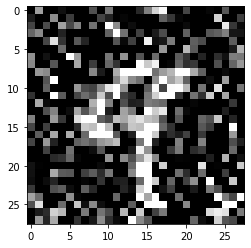

In [106]:
plt.imshow(x_train_noised[4].reshape(28,28), cmap='gray')

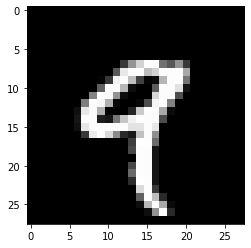

In [107]:
plt.imshow(x_train[4].reshape(28,28), cmap='gray')

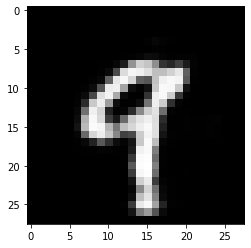

In [109]:
plt.imshow(pre_100.reshape(28,28), cmap='gray')

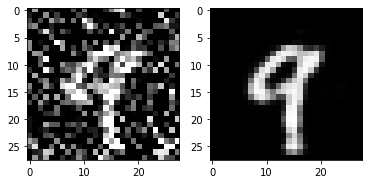

In [111]:
plt.subplot(1,2,1)
plt.imshow(x_train_noised[4].reshape(28,28), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pre_100.reshape(28,28), cmap='gray')
plt.show()